In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager
import seaborn as sns

In [2]:
TCG_Data = pd.read_csv("CleanedUp_Data.csv", encoding="latin1")
TCG_Data

,Specific_ID,Card Type,Card_Name,Set_Name,Generation,Release_Date,Artist,Types,Supertype,Price Â£
0,001 Of 102,1St Edition,Alakazam,Base,First,1/9/1999,Ken Sugimori,['Psychic'],Pokemon,27.95
1,001 Of 102,Uk Print,Alakazam,Base,First,1/9/1999,Ken Sugimori,['Psychic'],Pokemon,14.95
2,001 Of 102,Shadowless,Alakazam,Base,First,1/9/1999,Ken Sugimori,['Psychic'],Pokemon,7.95
3,001 Of 102,Unlimited,Alakazam,Base,First,1/9/1999,Ken Sugimori,['Psychic'],Pokemon,1.95
4,002 Of 102,1St Edition,Blastoise,Base,First,1/9/1999,Ken Sugimori,['Water'],Pokemon,119.95
...,...,...,...,...,...,...,...,...,...,...
4750,230 Of 234,Standard,Electromagnetic Radar,Unbroken Bonds,Seventh,5/3/2019,Yoshinobu Saito,NaN,Trainer,9.75
4751,231 Of 234,Standard,Fire Crystal,Unbroken Bonds,Seventh,5/3/2019,Yoshinobu Saito,NaN,Trainer,12.99
4752,232 Of 234,Standard,Metal Core Barrier,Unbroken Bonds,Seventh,5/3/2019,Studio Bora Inc.,NaN,Trainer,4.79
4753,233 Of 234,Standard,Pokegear 3.0,Unbroken Bonds,Seventh,5/3/2019,Studio Bora Inc.,NaN,Trainer,15.99


In [3]:
exchange_rate = 1.25  # Example rate (1 GBP = 1.25 USD)

# Convert 'Price Â£' to 'Price $' using the exchange rate
TCG_Data['Price $'] = TCG_Data['Price Â£'] * exchange_rate
TCG_Data

,Specific_ID,Card Type,Card_Name,Set_Name,Generation,Release_Date,Artist,Types,Supertype,Price Â£,Price $
0,001 Of 102,1St Edition,Alakazam,Base,First,1/9/1999,Ken Sugimori,['Psychic'],Pokemon,27.95,34.9375
1,001 Of 102,Uk Print,Alakazam,Base,First,1/9/1999,Ken Sugimori,['Psychic'],Pokemon,14.95,18.6875
2,001 Of 102,Shadowless,Alakazam,Base,First,1/9/1999,Ken Sugimori,['Psychic'],Pokemon,7.95,9.9375
3,001 Of 102,Unlimited,Alakazam,Base,First,1/9/1999,Ken Sugimori,['Psychic'],Pokemon,1.95,2.4375
4,002 Of 102,1St Edition,Blastoise,Base,First,1/9/1999,Ken Sugimori,['Water'],Pokemon,119.95,149.9375
...,...,...,...,...,...,...,...,...,...,...,...
4750,230 Of 234,Standard,Electromagnetic Radar,Unbroken Bonds,Seventh,5/3/2019,Yoshinobu Saito,NaN,Trainer,9.75,12.1875
4751,231 Of 234,Standard,Fire Crystal,Unbroken Bonds,Seventh,5/3/2019,Yoshinobu Saito,NaN,Trainer,12.99,16.2375
4752,232 Of 234,Standard,Metal Core Barrier,Unbroken Bonds,Seventh,5/3/2019,Studio Bora Inc.,NaN,Trainer,4.79,5.9875
4753,233 Of 234,Standard,Pokegear 3.0,Unbroken Bonds,Seventh,5/3/2019,Studio Bora Inc.,NaN,Trainer,15.99,19.9875


In [4]:
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = font_manager.FontProperties(fname=font_path)

plt.rcParams['font.family'] = font_prop.get_name()

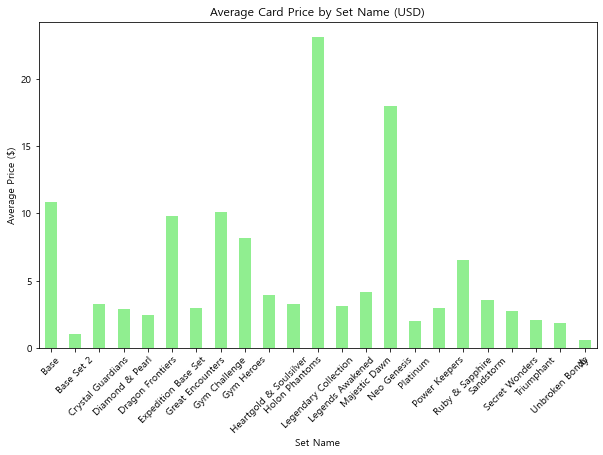

In [10]:
set_price_usd = TCG_Data.groupby('Set_Name')['Price $'].mean()

# Plot the comparison of average price in USD by Set Name
plt.figure(figsize=(10, 6))
set_price_usd.plot(kind='bar', color='lightgreen')
plt.title('Average Card Price by Set Name (USD)')
plt.xlabel('Set Name')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.show()

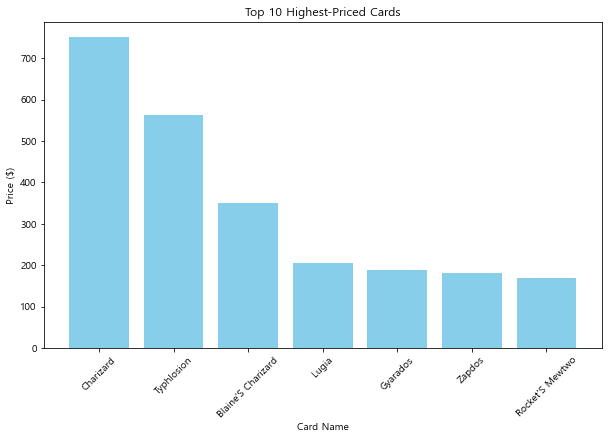

In [12]:
top_10_highest_cards = TCG_Data.sort_values(by='Price $', ascending=False).head(10)

# Plot a bar chart for the top 10 highest-priced cards
plt.figure(figsize=(10, 6))
plt.bar(top_10_highest_cards['Card_Name'], top_10_highest_cards['Price $'], color='skyblue')
plt.title('Top 10 Highest-Priced Cards')
plt.xlabel('Card Name')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()

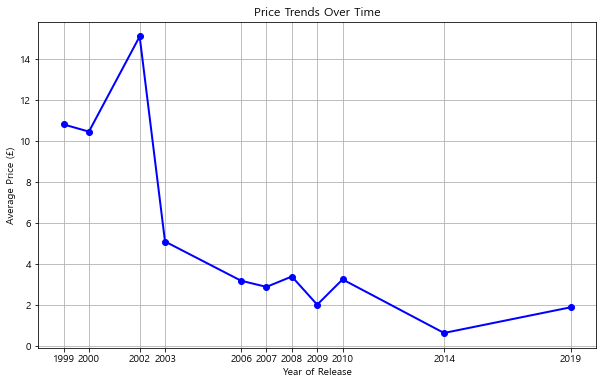

In [17]:
TCG_Data['Release_Date'] = pd.to_datetime(TCG_Data['Release_Date'])

# Extract the year from the Release_Date
TCG_Data['Release_Year'] = TCG_Data['Release_Date'].dt.year

# Group by 'Release_Year' and calculate the average price for each year in GBP
price_trends = TCG_Data.groupby('Release_Year')['Price Â£'].mean()

# Plot the price trends over time
plt.figure(figsize=(10, 6))
plt.plot(price_trends.index, price_trends.values, marker='o', color='b', linestyle='-', linewidth=2, markersize=6)
plt.title('Price Trends Over Time')
plt.xlabel('Year of Release')
plt.ylabel('Average Price (£)')
plt.grid(True)
plt.xticks(price_trends.index)
plt.show()